# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Modifying-customized_box_plot()" data-toc-modified-id="Modifying-customized_box_plot()-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Modifying customized_box_plot()</a></div><div class="lev2 toc-item"><a href="#plotting-one-variable" data-toc-modified-id="plotting-one-variable-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>plotting one variable</a></div><div class="lev2 toc-item"><a href="#Plotting-two-variables" data-toc-modified-id="Plotting-two-variables-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Plotting two variables</a></div><div class="lev2 toc-item"><a href="#Plotting-3-variables" data-toc-modified-id="Plotting-3-variables-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Plotting 3 variables</a></div><div class="lev1 toc-item"><a href="#Detecting-outliers" data-toc-modified-id="Detecting-outliers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Detecting outliers</a></div>

## Modifying customized_box_plot()

In [17]:
#: new version of the function
#: we will check if the variable provided has outliers with order


from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

def customized_box_plot(percentiles, xtlabels=None, redraw = True, printdata=False, *args, **kwargs):
    """
    Generates a customized boxplot based on the given percentile values
    """
    xtlabel = list()
    fig, ax = plt.subplots()
    axes = ax
    n_box = len(percentiles)      
    
    box_plot = axes.boxplot([[-9, -4, 2, 4, 9],]*n_box, *args, **kwargs) 
    # Creates len(percentiles) no of box plots

    min_y, max_y = float('inf'), -float('inf')

    for box_no, pdata in enumerate(percentiles):
        if xtlabels is None:
            xtlabel.append(str(box_no+1))
        else:
            xtlabel = xtlabels
        
        if len(pdata) == 6:
            #: outlier provided too
            (q1_start, q2_start, q3_start, q4_start, q4_end, fliers_xy) = pdata
            try:
                if len(fliers_xy[0]) != 0:
                    print("variable already with complete outliers arrays")
            except TypeError:
                arr_len = len(fliers_xy) 
                arr = np.full((1, arr_len), box_no+1, dtype=np.int)
                fliers_xy = [arr, fliers_xy]
                print("outliers arrays being fixed for variable %d" % box_no)
            
        elif len(pdata) == 5:
            #: only percentiles and no outliers provided
            (q1_start, q2_start, q3_start, q4_start, q4_end) = pdata
            fliers_xy = None
        else:
            raise ValueError("Percentile arrays for customized_box_plot must have either 5 or 6 values")
        if printdata:
            print(percentiles)
        # Lower cap
        box_plot['caps'][2*box_no].set_ydata([q1_start, q1_start])
        # xdata is determined by the width of the box plot

        # Lower whiskers
        box_plot['whiskers'][2*box_no].set_ydata([q1_start, q2_start])

        # Higher cap
        box_plot['caps'][2*box_no + 1].set_ydata([q4_end, q4_end])

        # Higher whiskers
        box_plot['whiskers'][2*box_no + 1].set_ydata([q4_start, q4_end])

        # Box
        path = box_plot['boxes'][box_no].get_path()
        path.vertices[0][1] = q2_start
        path.vertices[1][1] = q2_start
        path.vertices[2][1] = q4_start
        path.vertices[3][1] = q4_start
        path.vertices[4][1] = q2_start

        # Median
        box_plot['medians'][box_no].set_ydata([q3_start, q3_start])

        # Outliers
        if fliers_xy is not None and len(fliers_xy[0]) != 0:
            # If outliers exist
            box_plot['fliers'][box_no].set(xdata = fliers_xy[0],
                                           ydata = fliers_xy[1])

            min_y = min(q1_start, min_y, fliers_xy[1].min())
            max_y = max(q4_end, max_y, fliers_xy[1].max())

        else:
            min_y = min(q1_start, min_y)
            max_y = max(q4_end, max_y)

        # The y axis is rescaled to fit the new box plot completely with 10% 
        # of the maximum value at both ends
        # print(min_y, max_y)
        axes.set_ylim([min_y*1.1, max_y*1.1])
    ax.set_xticklabels(xtlabel)

    # If redraw is set to true, the canvas is updated.
    if redraw:
        axes.figure.canvas.draw()
    plt.show()
    return box_plot

## plotting one variable

In [9]:
var1= [[-1.5101813369410104, 0.20051552516175283, 0.8839713856971805, 1.575970005579948, 3.4881552580734554, 
        np.array([-1.98329217, -1.91932292,  4.16112339,  4.5,  4.6, 4.7,  5.1,  5.25])]]

len(var1)

1

outliers arrays being fixed for variable 0


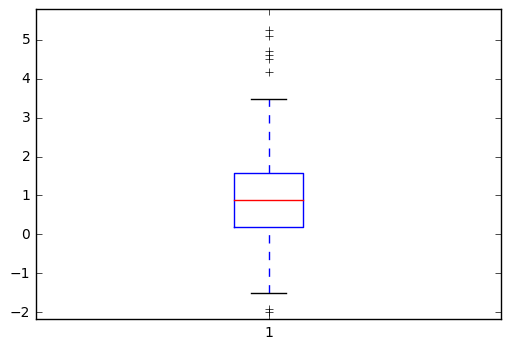

In [10]:

b = customized_box_plot(var1, redraw=True, notch=0, sym='+', vert=1, whis=1.5)


## Plotting two variables

In [11]:
var2 = [
    [0.046074393272752909, 1.3760634609664242, 2.6665020489404672, 5.1285508380255065, 10.666501091274366,  
     np.array([ 58.02866486,  11.45321818,  22.07822949,  22.45961125,
        16.87011061,  20.3233718 ,  15.85607562,  15.41986669,
        38.28052858,  12.98513382,  14.98140378,  11.07628   ,
        27.91280291,  24.56596929,  19.40586646,  17.63709413,
        11.78366448,  15.99032273,  16.39685225,  15.1011541 ,
        20.7520012 ,  28.02038221,  15.18711787,  11.77347242,
        18.80012143,  18.71984609,  25.33987546,  10.90768046,
        22.08223004,  13.47145357,  17.40222801,  11.85771055,
        19.25615699,  15.60277387,  13.98971756,  17.78220994,  14.43462277])], 
    [0.046074393272752909, 1.5246110253179361, 2.7479316437592698, 5.4891446185065549, 11.076279997386985,
        np.array([ 11.85771055,  20.7520012 ,  25.33987546,  20.7520012 ,
        15.1011541 ,  25.33987546,  22.07822949,  13.47145357,
        20.3233718 ,  17.40222801,  22.07822949,  15.41986669,
        15.85607562,  22.08223004,  15.85607562,  24.56596929,
        22.07822949,  18.80012143,  22.08223004,  13.47145357,
        24.56596929,  16.87011061,  13.98971756,  15.1011541 ,
        17.63709413,  25.33987546,  12.98513382,  11.85771055,
        18.80012143,  19.25615699,  19.25615699,  15.60277387,
        22.08223004,  16.39685225,  20.7520012 ,  20.7520012 ,
        19.40586646,  28.02038221,  20.3233718 ,  17.78220994,
        15.41986669,  11.77347242,  18.71984609,  17.78220994,
        22.08223004,  17.63709413,  11.78366448])]]
len(var2)

2

outliers arrays being fixed for variable 0
outliers arrays being fixed for variable 1


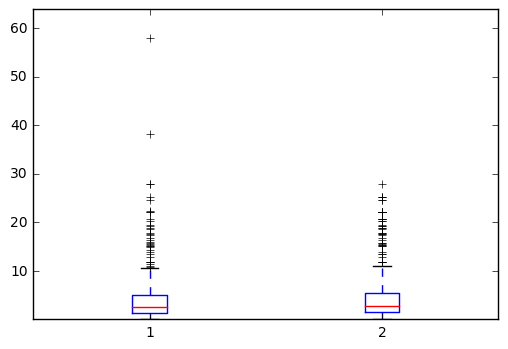

In [13]:
b = customized_box_plot(var2, redraw=True, notch=0, sym='+', vert=1, whis=1.5)

## Plotting 3 variables

In [15]:
var3 = [
    [0.0010843233045542845, 0.25565718336819021, 0.65655818225384854, 1.4097895748558775, 3.1381483731475055,
     np.array([ 3.85936004,  3.64947577,  3.58858888,  3.92276005,  3.77442565,
        3.95079551,  3.85634407,  5.16496041,  3.85936004,  4.76743735,
        3.64813252,  3.15551507,  5.12903467,  3.38026   ,  3.60470992,
        3.95079551,  3.38026   ,  3.38026   ,  4.76743735,  3.64947577,
        4.71882111,  3.64947577,  5.12903467,  3.38026   ,  3.58858888,
        3.60470992,  3.30765364,  5.7030546, 7, 8, 9.0 ])], 

    [-2.2249477265050892, 4.5702758656293687, 7.2478994483455628, 11.263281071715951, 21.053087871065749, 
      np.array([ 22.02031101,  26.11582744,  21.35240282,  25.03574698, 22.36123611,  
                22.08104521,  28.11464668,  22.66492001, 23.33994018,  23.58629287,
                24.1, 24.2, 24.3, 24.4, 24.5
               ])],

    [-0.58468752435062044, 4.8192011234992709, 7.5908768584897182, 11.638280693192987, 21.352402819727644, 
     np.array([ 22.36123611,  22.08104521,  22.08104521,  22.66492001, 25.03574698,  
               23.33994018,  22.08104521,  23.58629287,  26.11582744])]
    ]
len(var3)

3

outliers arrays being fixed for variable 0
outliers arrays being fixed for variable 1
outliers arrays being fixed for variable 2


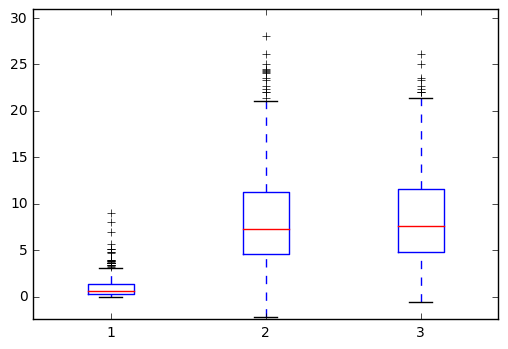

In [16]:
b = customized_box_plot(var3, redraw=True, notch=0, sym='+', vert=1, whis=1.5)

# Detecting outliers

http://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data

In [18]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [19]:
mask = is_outlier(data[2], 3.65)    #: boolean array with outliers

NameError: name 'data' is not defined

In [361]:
data[2][mask]

array([ 19.4816154 ,  17.7197534 ,  24.21645026,  16.31742435,
        10.1848823 ,  21.97692816,  15.0967663 ,  13.72055384,
        24.38212717,  21.0524112 ,  15.17149547,  21.3877546 ,
        25.12988966,  12.96084902,  23.29446521,  17.33851977,
        15.83410668,  17.61323445,  15.29418214,  22.1087928 ,
        10.1593045 ,  11.07912624,  20.1676824 ,  13.98339728,
        10.38547715,  10.21222151,  30.28459697,  21.78901242,
        10.93794542,  19.89847484,  23.65646077,  16.44377819,
        14.48816665,  15.07056186,  14.22190308,  11.35971705,
        10.0448614 ,  23.62643254,  45.24460726,  19.41745861,  11.82238295])

In [355]:
len(data[2][mask])

41

In [356]:
len(np.array([ 19.4816154 ,  17.7197534 ,  24.21645026,  16.31742435,
        10.1848823 ,  21.97692816,  15.0967663 ,  13.72055384,
        24.38212717,  21.0524112 ,  15.17149547,  21.3877546 ,
        25.12988966,  12.96084902,  23.29446521,  17.33851977,
        15.83410668,  17.61323445,  15.29418214,  22.1087928 ,
        10.1593045 ,  11.07912624,  20.1676824 ,  13.98339728,
        10.38547715,  10.21222151,  30.28459697,  21.78901242,
        10.93794542,  19.89847484,  23.65646077,  16.44377819,
        14.48816665,  15.07056186,  14.22190308,  11.35971705,
        10.0448614 ,  23.62643254,  45.24460726,  19.41745861,  11.82238295]))

41